In [2]:
import pandas as pd

# Load rides data
rides_df = pd.read_csv('cab_rides.csv')
rides_df.head()



,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [3]:
rides_df = rides_df[rides_df['price'].notnull()]
rides_df.reset_index(drop=True, inplace=True)


In [4]:
# Convert to datetime 
rides_df['time_stamp'] = pd.to_datetime(rides_df['time_stamp'], unit='ms')

# Now you can safely use .dt
rides_df['hour'] = rides_df['time_stamp'].dt.hour
rides_df['day_of_week'] = rides_df['time_stamp'].dt.day_name()

In [5]:
rides_df['is_surge'] = rides_df['surge_multiplier'].apply(lambda x: 1 if x > 1 else 0)


In [6]:
rides_df.head()
rides_df.info()
rides_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637976 entries, 0 to 637975
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   distance          637976 non-null  float64       
 1   cab_type          637976 non-null  object        
 2   time_stamp        637976 non-null  datetime64[ns]
 3   destination       637976 non-null  object        
 4   source            637976 non-null  object        
 5   price             637976 non-null  float64       
 6   surge_multiplier  637976 non-null  float64       
 7   id                637976 non-null  object        
 8   product_id        637976 non-null  object        
 9   name              637976 non-null  object        
 10  hour              637976 non-null  int32         
 11  day_of_week       637976 non-null  object        
 12  is_surge          637976 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int32(1), int64(1), objec

,distance,time_stamp,price,surge_multiplier,hour,is_surge
count,637976.000000,637976,637976.000000,637976.000000,637976.000000,637976.000000
mean,2.189261,2018-12-05 21:34:05.413373440,16.545125,1.015068,11.618528,0.032877
min,0.020000,2018-11-26 03:40:46.318000,2.500000,1.000000,0.000000,0.000000
25%,1.270000,2018-11-28 22:26:08.211000064,9.000000,1.000000,6.000000,0.000000
50%,2.160000,2018-12-02 07:52:59.568000,13.500000,1.000000,12.000000,0.000000
75%,2.930000,2018-12-14 22:45:04.678000128,22.500000,1.000000,18.000000,0.000000
max,7.860000,2018-12-18 19:15:10.943000,97.500000,3.000000,23.000000,1.000000
std,1.135413,NaN,9.324359,0.095422,6.948776,0.178316


In [7]:
weather_df = pd.read_csv('weather.csv', dtype={'time_stamp': 'int64'})
weather_df.head()


,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49


In [8]:
weather_df['time_stamp'].head()


0    1545003901
1    1545003901
2    1545003901
3    1545003901
4    1545003901
Name: time_stamp, dtype: int64

In [9]:
weather_df['time_stamp'] = pd.to_datetime(weather_df['time_stamp'], unit='s')


In [10]:
weather_df['time_stamp'].min(), weather_df['time_stamp'].max()


(Timestamp('2018-11-26 03:40:44'), Timestamp('2018-12-18 18:45:02'))

In [11]:
weather_df['time_hour'] = weather_df['time_stamp'].dt.floor('H')


C:\Users\mohit\AppData\Local\Temp\ipykernel_22824\2941084879.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  weather_df['time_hour'] = weather_df['time_stamp'].dt.floor('H')


In [12]:
rides_df['time_hour'] = rides_df['time_stamp'].dt.floor('H')


C:\Users\mohit\AppData\Local\Temp\ipykernel_22824\3233840351.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  rides_df['time_hour'] = rides_df['time_stamp'].dt.floor('H')


In [13]:
rides_df.head()


,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,hour,day_of_week,is_surge,time_hour
0,0.44,Lyft,2018-12-16 09:30:07.890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,9,Sunday,0,2018-12-16 09:00:00
1,0.44,Lyft,2018-11-27 02:00:23.677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,2,Tuesday,0,2018-11-27 02:00:00
2,0.44,Lyft,2018-11-28 01:00:22.198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,1,Wednesday,0,2018-11-28 01:00:00
3,0.44,Lyft,2018-11-30 04:53:02.749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,4,Friday,0,2018-11-30 04:00:00
4,0.44,Lyft,2018-11-29 03:49:20.223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,3,Thursday,0,2018-11-29 03:00:00


In [14]:
weather_df.head()

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind,time_hour
0,42.42,Back Bay,1.0,1012.14,0.1228,2018-12-16 23:45:01,0.77,11.25,2018-12-16 23:00:00
1,42.43,Beacon Hill,1.0,1012.15,0.1846,2018-12-16 23:45:01,0.76,11.32,2018-12-16 23:00:00
2,42.50,Boston University,1.0,1012.15,0.1089,2018-12-16 23:45:01,0.76,11.07,2018-12-16 23:00:00
3,42.11,Fenway,1.0,1012.13,0.0969,2018-12-16 23:45:01,0.77,11.09,2018-12-16 23:00:00
4,43.13,Financial District,1.0,1012.14,0.1786,2018-12-16 23:45:01,0.75,11.49,2018-12-16 23:00:00


In [15]:
merged_df = pd.merge(
    rides_df,
    weather_df,
    how='left',
    left_on=['source', 'time_hour'],
    right_on=['location', 'time_hour']
)


In [16]:
# Drop duplicate or unnecessary columns
merged_df.drop(columns=['location', 'time_stamp_y'], inplace=True)
merged_df.rename(columns={'time_stamp_x': 'time_stamp'}, inplace=True)


In [17]:
merged_df.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,hour,day_of_week,is_surge,time_hour,temp,clouds,pressure,rain,humidity,wind
0,0.44,Lyft,2018-12-16 09:30:07.890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,9,Sunday,0,2018-12-16 09:00:00,38.46,0.29,1022.25,NaN,0.76,7.68
1,0.44,Lyft,2018-11-27 02:00:23.677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,2,Tuesday,0,2018-11-27 02:00:00,44.31,1.00,1003.17,0.1123,0.90,13.69
2,0.44,Lyft,2018-11-27 02:00:23.677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,2,Tuesday,0,2018-11-27 02:00:00,43.82,0.99,1002.59,0.0997,0.89,11.57
3,0.44,Lyft,2018-11-28 01:00:22.198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,1,Wednesday,0,2018-11-28 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN
4,0.44,Lyft,2018-11-30 04:53:02.749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,4,Friday,0,2018-11-30 04:00:00,35.08,0.00,1013.71,NaN,0.70,5.25


Text(0, 0.5, 'Average Price')

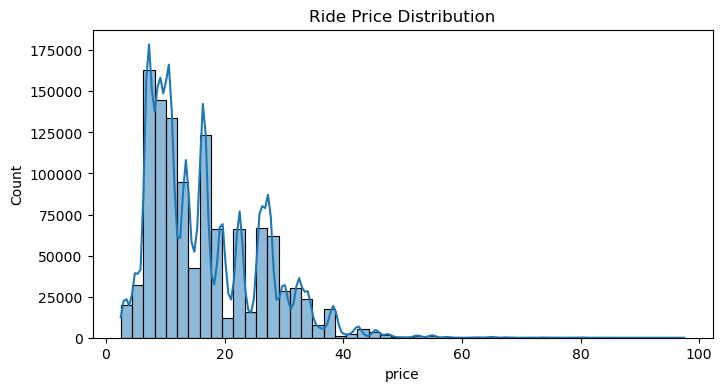

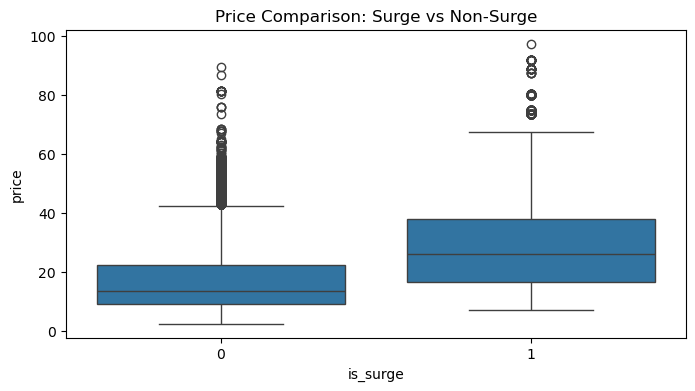

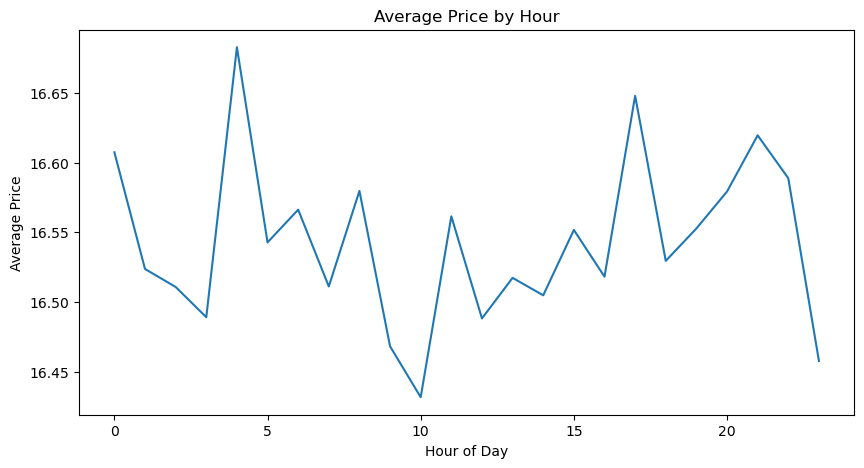

In [18]:
# Imports
import seaborn as sns
import matplotlib.pyplot as plt

# Price distribution
plt.figure(figsize=(8, 4))
sns.histplot(merged_df['price'], bins=50, kde=True)
plt.title('Ride Price Distribution')

# Surge vs non-surge price comparison
plt.figure(figsize=(8, 4))
sns.boxplot(x='is_surge', y='price', data=merged_df)
plt.title('Price Comparison: Surge vs Non-Surge')

# Average price by hour
plt.figure(figsize=(10, 5))
sns.lineplot(data=merged_df.groupby('hour')['price'].mean())
plt.title('Average Price by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Price')


In [19]:
merged_df.isnull().sum()


distance                 0
cab_type                 0
time_stamp               0
destination              0
source                   0
price                    0
surge_multiplier         0
id                       0
product_id               0
name                     0
hour                     0
day_of_week              0
is_surge                 0
time_hour                0
temp                  2734
clouds                2734
pressure              2734
rain                977419
humidity              2734
wind                  2734
dtype: int64

In [20]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1167730 entries, 0 to 1167729
Data columns (total 20 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   distance          1167730 non-null  float64       
 1   cab_type          1167730 non-null  object        
 2   time_stamp        1167730 non-null  datetime64[ns]
 3   destination       1167730 non-null  object        
 4   source            1167730 non-null  object        
 5   price             1167730 non-null  float64       
 6   surge_multiplier  1167730 non-null  float64       
 7   id                1167730 non-null  object        
 8   product_id        1167730 non-null  object        
 9   name              1167730 non-null  object        
 10  hour              1167730 non-null  int32         
 11  day_of_week       1167730 non-null  object        
 12  is_surge          1167730 non-null  int64         
 13  time_hour         1167730 non-null  dateti

In [21]:
merged_df = merged_df[merged_df['price'].notnull()]


In [22]:
merged_df['rain'].fillna(0, inplace=True)


C:\Users\mohit\AppData\Local\Temp\ipykernel_22824\1649395315.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['rain'].fillna(0, inplace=True)


In [23]:
merged_df = merged_df.dropna()


In [24]:
merged_df.to_csv('cleaned_ride_data.csv', index=False)


In [25]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1164996 entries, 0 to 1167729
Data columns (total 20 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   distance          1164996 non-null  float64       
 1   cab_type          1164996 non-null  object        
 2   time_stamp        1164996 non-null  datetime64[ns]
 3   destination       1164996 non-null  object        
 4   source            1164996 non-null  object        
 5   price             1164996 non-null  float64       
 6   surge_multiplier  1164996 non-null  float64       
 7   id                1164996 non-null  object        
 8   product_id        1164996 non-null  object        
 9   name              1164996 non-null  object        
 10  hour              1164996 non-null  int32         
 11  day_of_week       1164996 non-null  object        
 12  is_surge          1164996 non-null  int64         
 13  time_hour         1164996 non-null  datetime64[